In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1. Simple data 형성

In [2]:
# 랜덤한 데이터 형성 (시드 부여)
np.random.seed(2022)

x = np.random.randint(1,50,30)
y = np.random.randint(1,50,30)

print(x)
print(y)

[29 46 49 49 25 19 25 17 42 34 28 12 20 31 41 12 49 20 39  9 15 30 17 27
 12 31 34  3 17 16]
[24 38 18 24 22 38 20 13 46 27 13 15 33 14 14 43  1 46 30 24 38 22 12 44
 47  3  1 37 47 42]


## 1-1. 데이터 시각화

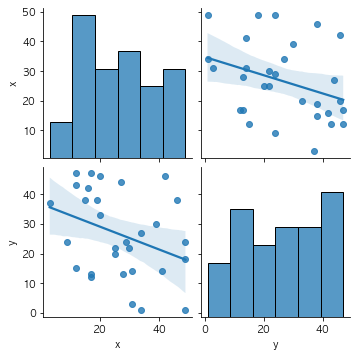

In [3]:
# 데이터 프레임 형성
sample = pd.DataFrame(list(zip(x,y)), columns=['x','y'])

# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.

sns.pairplot(sample, kind='reg')
plt.show()

## 1-2. 상관분석

### A. 공분산

In [4]:
# 하나씩 시행해보기

# mu = mean (공통적으로 적용)
mu_1 = np.sum(sample['x'])/len(sample['x'])
mu_2 = np.sum(sample['y'])/len(sample['y'])

# var = variance (잔차의 재곱합의 평균), 표준편차 = var의 제곱근
var_1 = np.sum([pow(i - mu_1, 2) for i in sample['x']]) / (len(sample['x']))
var_2 = np.sum([pow(i - mu_2, 2) for i in sample['y']]) / (len(sample['y']))
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

# 공분산 (표본상관계수를 구하는 것이 아니고 모집단으로 도출하므로 자유도는 0으로 설정하였음.)
covariance = sum( (sample['x'] - mu_1) * (sample['y'] - mu_2) ) / (len(sample['x']))

# COV(X,Y) : 모집단인 경우 (numpy와 비교, 자유도 0 설정은 ddof=0)
print(covariance)
print(np.cov(sample['x'],sample['y'], ddof=0)) # 공분산 행렬의 (1,2), (2,1)이 COV(X,Y)

-61.68666666666666
[[160.90666667 -61.68666667]
 [-61.68666667 200.91555556]]


### B. 피어슨 상관계수

In [5]:
# 위의 공분산에서 이어짐
correlation = covariance / (std_1 * std_2)

# 피어슨 상관계수
print(correlation)

-0.34308166001608753


In [6]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr
# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(sample['x'], sample['y'])

(-0.3430816600160875, 0.0634428569239739)

In [7]:
# 함수화 시행
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(sample['x'], sample['y'], True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(sample['x'], sample['y'], False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 160.907, COV(Y,Y) = 200.916(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : -61.687
모집단 data에 대한 피어슨 상관계수 값 : -0.343
Scipy로 구한 피어슨 상관계수는 -0.343입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 6.343999999999999%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 166.455, COV(y,y) = 207.844(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -63.814
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.343
Scipy로 구한 피어슨 상관계수는 -0.343입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 6.343999999999999%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


### C. 스피어만 상관계수

In [8]:
# 랜덤한 데이터 형성 (시드 부여)
np.random.seed(2022)

x1 = np.random.randint(1,20,10)
y1 = np.random.randint(1,20,10)

print('x1 :',x1)
print('y1 :',y1)

sample1 = pd.DataFrame(list(zip(x1,y1)), columns=['x','y'])
print('\nsmaple1 dataframe은 다음과 같습니다.')
sample1

x1 : [14 17 18 18 17 19 17 10  2 12]
y1 : [ 9 12 17  7  9 15 17 12  2  3]

smaple1 dataframe은 다음과 같습니다.


,x,y
0,14,9
1,17,12
2,18,17
3,18,7
4,17,9
5,19,15
6,17,17
7,10,12
8,2,2
9,12,3


In [9]:
sample1['rank_x'] = pd.DataFrame(sample1['x'].rank())
sample1['rank_y'] = pd.DataFrame(sample1['y'].rank())
sample1['diff'] = sample1['rank_x'] - sample1['rank_y']
sample1['d^2'] = sample1['diff'] ** 2

sample1

,x,y,rank_x,rank_y,diff,d^2
0,14,9,4.0,4.5,-0.5,0.25
1,17,12,6.0,6.5,-0.5,0.25
2,18,17,8.5,9.5,-1.0,1.00
3,18,7,8.5,3.0,5.5,30.25
4,17,9,6.0,4.5,1.5,2.25
5,19,15,10.0,8.0,2.0,4.00
6,17,17,6.0,9.5,-3.5,12.25
7,10,12,2.0,6.5,-4.5,20.25
8,2,2,1.0,1.0,0.0,0.00
9,12,3,3.0,2.0,1.0,1.00


In [10]:
n = len(sample1['d^2'])
sq_distance = 6 * sample1['d^2'].sum()
spearman = 1 - sq_distance / (n * ( n ** 2 - 1))
spearman

0.5666666666666667

In [11]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(sample1['x'], sample1['y'])

SpearmanrResult(correlation=0.5559113444061977, pvalue=0.09519504230496476)

In [12]:
sample1[{'x','y'}].corr(method='spearman')

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_3452/23926823.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sample1[{'x','y'}].corr(method='spearman')


,x,y
x,1.000000,0.555911
y,0.555911,1.000000


In [13]:
# sub1 = pd.DataFrame(sample1['x'].sort_values().values).rank(method='min', ascending=True)
# sub2 = pd.DataFrame(sample1['y'].sort_values().values).rank(method='min', ascending=True)

# ranked = pd.concat((sub1,sub2), axis=1)
# ranked.columns = ['ranked_x1','ranked_y1']
# ranked

### D. 켄달 상관계수

In [14]:
from scipy.stats import kendalltau

X = [12, 2, 1, 11, 3]
Y = [1, 4, 7, 2, 0]

print(kendalltau(X,Y))

# 데이터 프레임 형성 (x, y + x, y의 rank)
kendal_df = pd.DataFrame(list(zip(X,Y)), columns=['x','y'])
kendal_df
kendal_df['x_rank'] = kendal_df['x'].rank()
kendal_df['y_rank'] = kendal_df['y'].rank()
kendal_df

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)


,x,y,x_rank,y_rank
0,12,1,5.0,2.0
1,2,4,2.0,4.0
2,1,7,1.0,5.0
3,11,2,4.0,3.0
4,3,0,3.0,1.0


In [15]:
# x의 rank를 기준으로 재정렬
sort_kendal = kendal_df.sort_values(by='x_rank').reset_index()
sort_kendal.drop(columns='index', inplace=True)
sort_kendal

,x,y,x_rank,y_rank
0,1,7,1.0,5.0
1,2,4,2.0,4.0
2,3,0,3.0,1.0
3,11,2,4.0,3.0
4,12,1,5.0,2.0


In [16]:
s = []
for i in range(4):
    if sort_kendal['y_rank'][i] < sort_kendal['y_rank'][i+1] :
        s.append('upward')
    else:
        s.append('downward')


sort_kendal = pd.concat([sort_kendal, pd.DataFrame(s, columns={'direction'})], axis=1)
sort_kendal

,x,y,x_rank,y_rank,direction
0,1,7,1.0,5.0,downward
1,2,4,2.0,4.0,downward
2,3,0,3.0,1.0,upward
3,11,2,4.0,3.0,downward
4,12,1,5.0,2.0,NaN


In [17]:
C = [0, 0, 1, 0]
D = [2, 1, 0, 1]

kendal = pd.concat([sort_kendal, pd.DataFrame(list(zip(C,D)), columns=['c','d'])], axis=1)
kendal

c = kendal['c'].sum()
d = kendal['d'].sum()

print(f'kendal 상관계수의 값은 (c-d)/(c+d)입니다. 즉 {(c-d)/(c+d)}로 도출됩니다.')

kendal 상관계수의 값은 (c-d)/(c+d)입니다. 즉 -0.6로 도출됩니다.


# 실습 (데이터 불러오기)

In [18]:
# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2022-01-01', '2022-01-21')

stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
           005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                 
2022-01-04   78700.0  2989.239990   78700.0  2989.239990   79200.0   
2022-01-05   77400.0  2953.969971   77400.0  2953.969971   79000.0   
2022-01-06   76900.0  2920.530029   76900.0  2920.530029   77600.0   
2022-01-07   78300.0  2954.889893   78300.0  2954.889893   78400.0   
2022-01-10   78000.0  2926.719971   78000.0  2926.719971   78100.0   
2022-01-11   78900.0  2927.379883   78900.0  2927.379883   79000.0   
2022-01-12   78900.0  2972.479980   78900.0  2972.479980   79600.0   
2022-01-13   77900.0  2962.090088   77900.0  2962.090088   79300.0   
2022-01-14   77300.0  2921.919922   77300.0  2921.919922   78100.0   
2022-01-17   77500.0  2890.100098   77500.0  2890.100098   77800.0   
2022-01-18   77000.0  2864.239990   77000.0  2864.239990   77800.0   
2022-01-19   76300.0  2842.280029   76300.0  2842.280029   76900.0   
2022-01-20   76500.0  2862.679932   76500.0  2862.679932   76700.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2022-01-04  2995.250000   78300.0  2973.080078   78800.0  2991.969971   
2022-01-05  2986.199951   76400.0  2936.729980   78800.0  2984.050049   
2022-01-06  2952.540039   76600.0  2915.379883   76700.0  2925.399902   
2022-01-07  2959.030029   77400.0  2933.100098   78100.0  2933.780029   
2022-01-10  2951.120117   77100.0  2910.899902   78100.0  2947.370117   
2022-01-11  2943.570068   78000.0  2909.820068   78400.0  2930.929932   
2022-01-12  2972.580078   78600.0  2950.310059   79500.0  2950.780029   
2022-01-13  2982.139893   77900.0  2958.389893   79300.0  2979.909912   
2022-01-14  2944.969971   77100.0  2914.729980   77700.0  2937.610107   
2022-01-17  2919.669922   76900.0  2875.979980   77600.0  2918.550049   
2022-01-18  2902.790039   76600.0  2857.260010   77600.0  2898.979980   
2022-01-19  2871.790039   76100.0  2832.179932   76500.0  2840.340088   
2022-01-20  2862.699951   75900.0  2830.969971   76200.0  2842.280029   

              Volume          
           005930.KS   ^KS11  
Date                          
2022-01-04  12427416  621200  
2022-01-05  25470640  786900  
2022-01-06  12931954  785500  
2022-01-07  15163757  545800  
2022-01-10   9947422  477000  
2022-01-11  13221123  565800  
2022-01-12  11000502  519000  
2022-01-13  13889401  604600  
2022-01-14  10096725  532300  
2022-01-17   8785122  592900  
2022-01-18   9592788  553700  
2022-01-19  10598290  463400  
2022-01-20   9708168  395400

## 상관분석

### A. 공분산

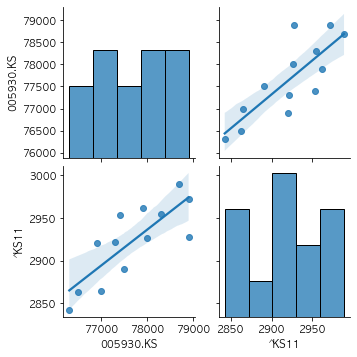

In [19]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = stock_price['Adj Close']

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

### B. 피어슨 상관 계수

In [20]:
# 하나씩 시행해보기
# 변수 지정
x1 = stock_price['Adj Close']['005930.KS']
x2 = stock_price['Adj Close']['^KS11']

# 만약 표본상관계수를 도출하게 된다면 (n-1로 또 나눠주어야 함)
# mu = mean (공통적으로 적용)
mu_1 = np.sum(x1)/len(x1)
mu_2 = np.sum(x2)/len(x2)
# 분산을 구하는 부분에서도 모분산 추정이므로 자유도 1 설정
var_1 = np.sum([pow(i - mu_1, 2) for i in x1]) / (len(x1) - 1)
var_2 = np.sum([pow(i - mu_2, 2) for i in x2]) / (len(x2) - 1)
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

covariance_ddof = sum( (x1 - mu_1) * (x2 - mu_2) ) / (len(x1) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2)

# COV(X,Y) : 표본인 경우 (numpy와 비교)
print(covariance_ddof)
print(np.cov(x1,x2))
# 피어슨 상관계수
print(correlation_ddof)

32063.144155649043
[[764230.76923077  32063.14415565]
 [ 32063.14415565   2088.44589524]]
0.8025687284641172


In [21]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr
# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(x1, x2)

(0.8025687284641172, 0.0009595619740597607)

In [22]:
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(x1, x2, True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(x1, x2, False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 705443.787, COV(Y,Y) = 1927.796(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 29596.748
모집단 data에 대한 피어슨 상관계수 값 : 0.803
Scipy로 구한 피어슨 상관계수는 0.803입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.096%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 764230.769, COV(y,y) = 2088.446(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : 32063.144
표본 data로 추정한 모집단의 피어슨 상관계수 값 : 0.803
Scipy로 구한 피어슨 상관계수는 0.803입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.096%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


### C. 스피어만 상관 계수

In [23]:
# 스피어만 계수는 순위합으로 도출되기 때문에, 이를 직접 구현하기 위해선 ordinalencoder로 순위를 구하고 순위합을 도출해야 함
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# transform data (데이터를 인코딩하는 작업)
result = encoder.fit_transform(stock_price['Adj Close'])
result = pd.DataFrame(result, columns={'Samsung', 'KOSPI'})
# 순위 척도의 차이를 도출하는 부분
result['diff'] = result['Samsung'] - result['KOSPI']
# 데이터 개수 지정
n = len(result['diff'])

# 스피어만 계수 산출하는 부분 (스피어만 계수 산출 공식 적용)
sum_diff = 6 * sum([pow(i, 2) for i in result['diff'].tolist()])
spearman = 1 - sum_diff/(n * (n ** 2 -1))
spearman

0.8434065934065934

In [24]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(x1, x2)

SpearmanrResult(correlation=0.8308123402999015, pvalue=0.0004349404431727389)

In [25]:
# 스피어만 계수는 순위 척도를 계산한 후에는 피어슨 계수와 구하는 공식이 동일하기 때문에 위의 피어슨 계수에 이를 입력하여도 동일한 결과를 가져옴
# 따라서 밑에는 피어슨 계수로 값이 출력되었지만, 사실은 스피어만 계수임 (따라서 공분산 값과 분산은 확인하지 않아도 됨)
cov_pearson(result['Samsung'], result['KOSPI'], True)

print('\n스피어만 계수와 비교')
cov_pearson(x1, x2, True)

모집단 data 각각의 분산 값은 COV(X,X) = 14.0, COV(Y,Y) = 13.148(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 11.385
모집단 data에 대한 피어슨 상관계수 값 : 0.839
Scipy로 구한 피어슨 상관계수는 0.839입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.034%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.

스피어만 계수와 비교
모집단 data 각각의 분산 값은 COV(X,X) = 705443.787, COV(Y,Y) = 1927.796(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : 29596.748
모집단 data에 대한 피어슨 상관계수 값 : 0.803
Scipy로 구한 피어슨 상관계수는 0.803입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.096%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


### D. 켄달 상관계수

In [26]:
# simple data 부분 잠시 리뷰
from scipy.stats import kendalltau

X = [12, 2, 1, 11, 3]
Y = [1, 4, 7, 2, 0]

kendalltau(X,Y)

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)

In [27]:
kendalltau(x1, x2)

KendalltauResult(correlation=0.6838852006725745, pvalue=0.0011973714876856232)

### 참고) heatmap

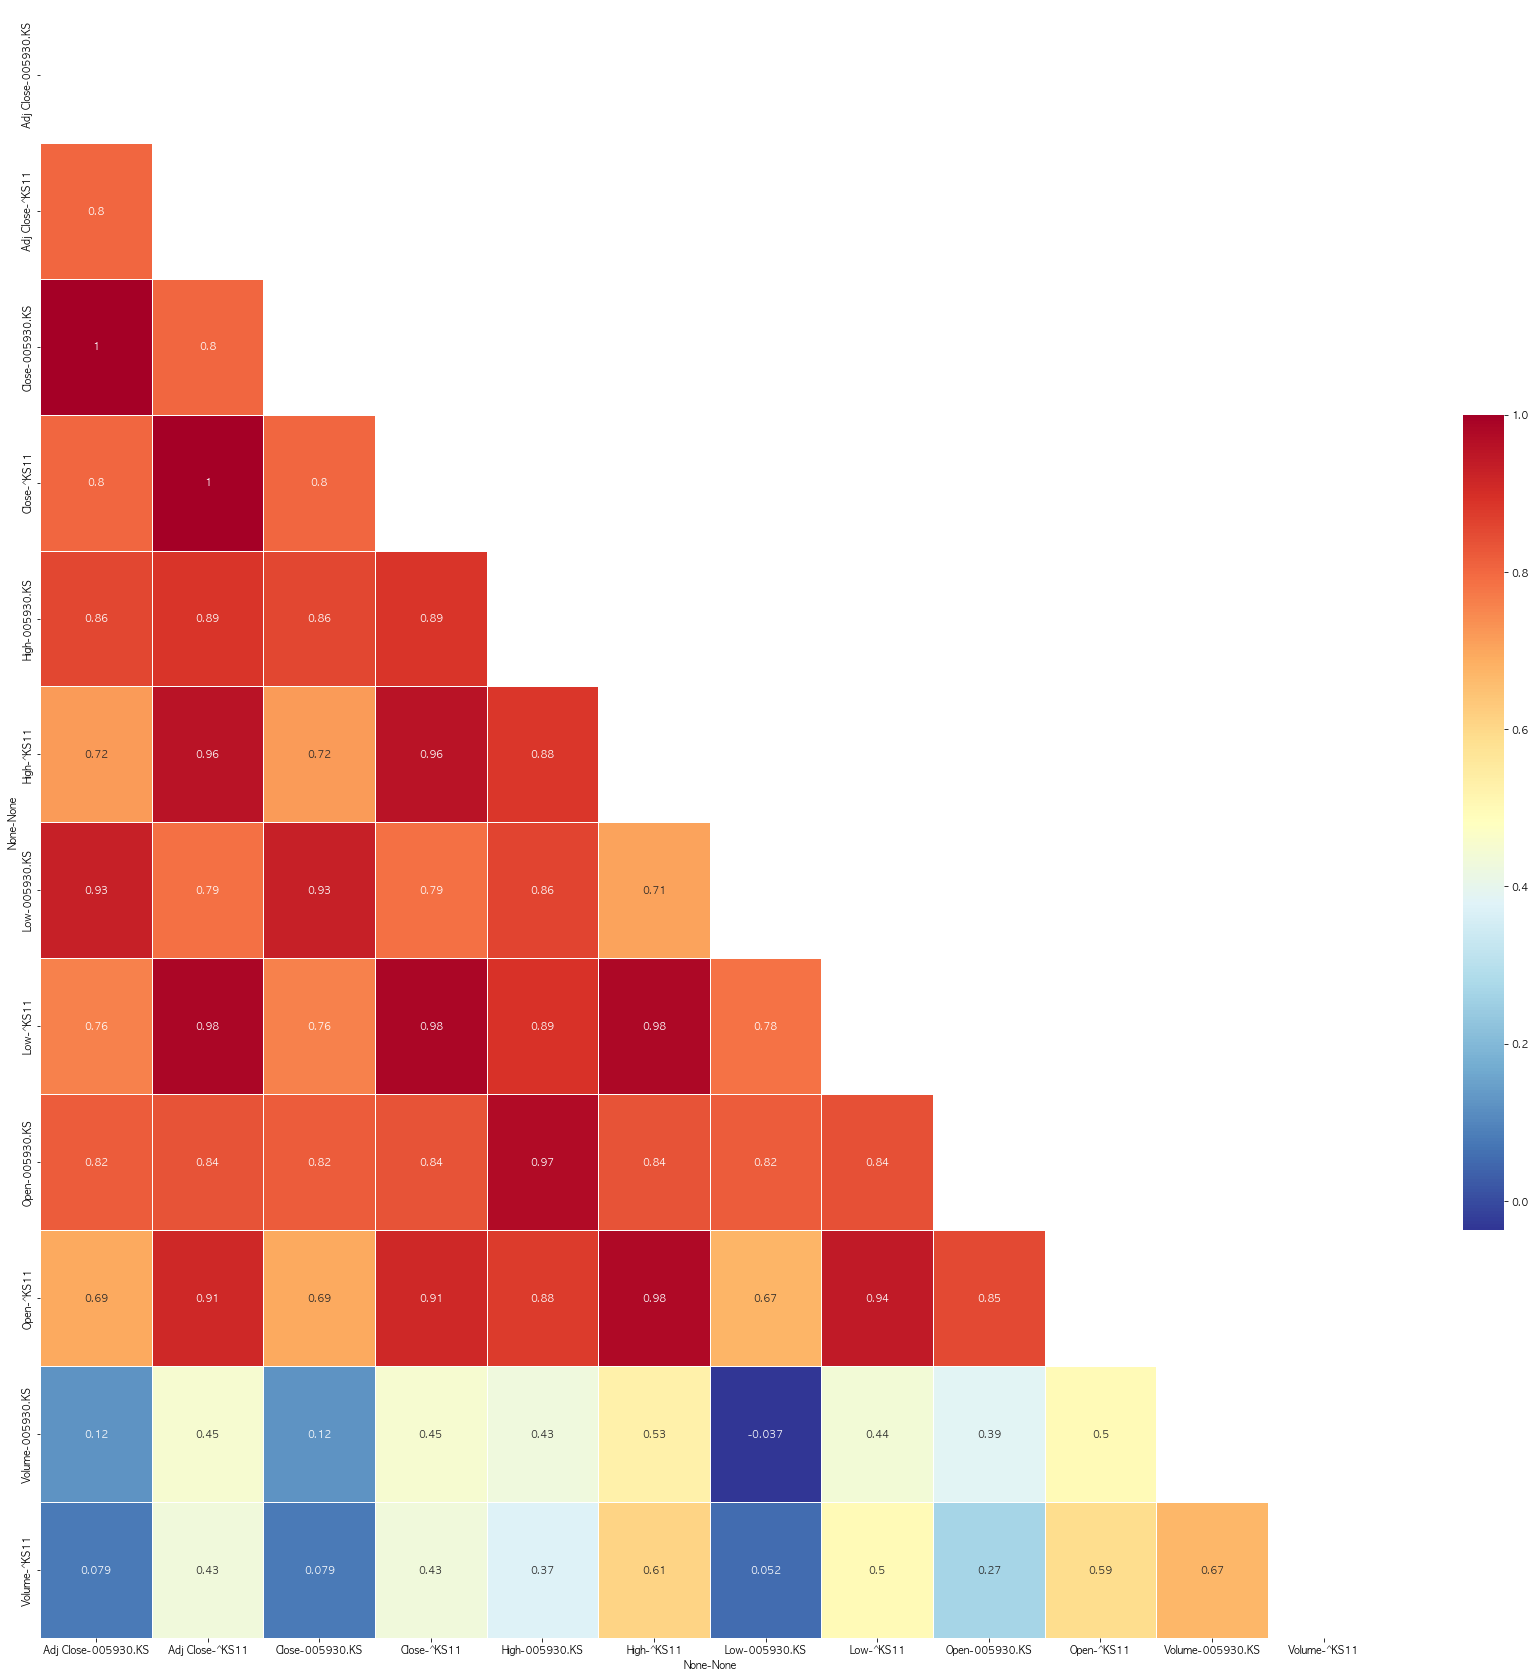

In [28]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
        method_option (str, optional): [correlation을 도출하는 방식 선택]. Defaults to 'pearson' in addition, there are other options ('spearman', 'kendall').
        
    """
    # 라이브러리 호출
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    # 한글폰트 출력 가능 코드
    from matplotlib import rc
    rc('font', family='AppleGothic') # Mac Os
    #rc('font', family='NanumGothic') # Windows Os
    plt.rcParams['axes.unicode_minus'] = False
    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(stock_price)

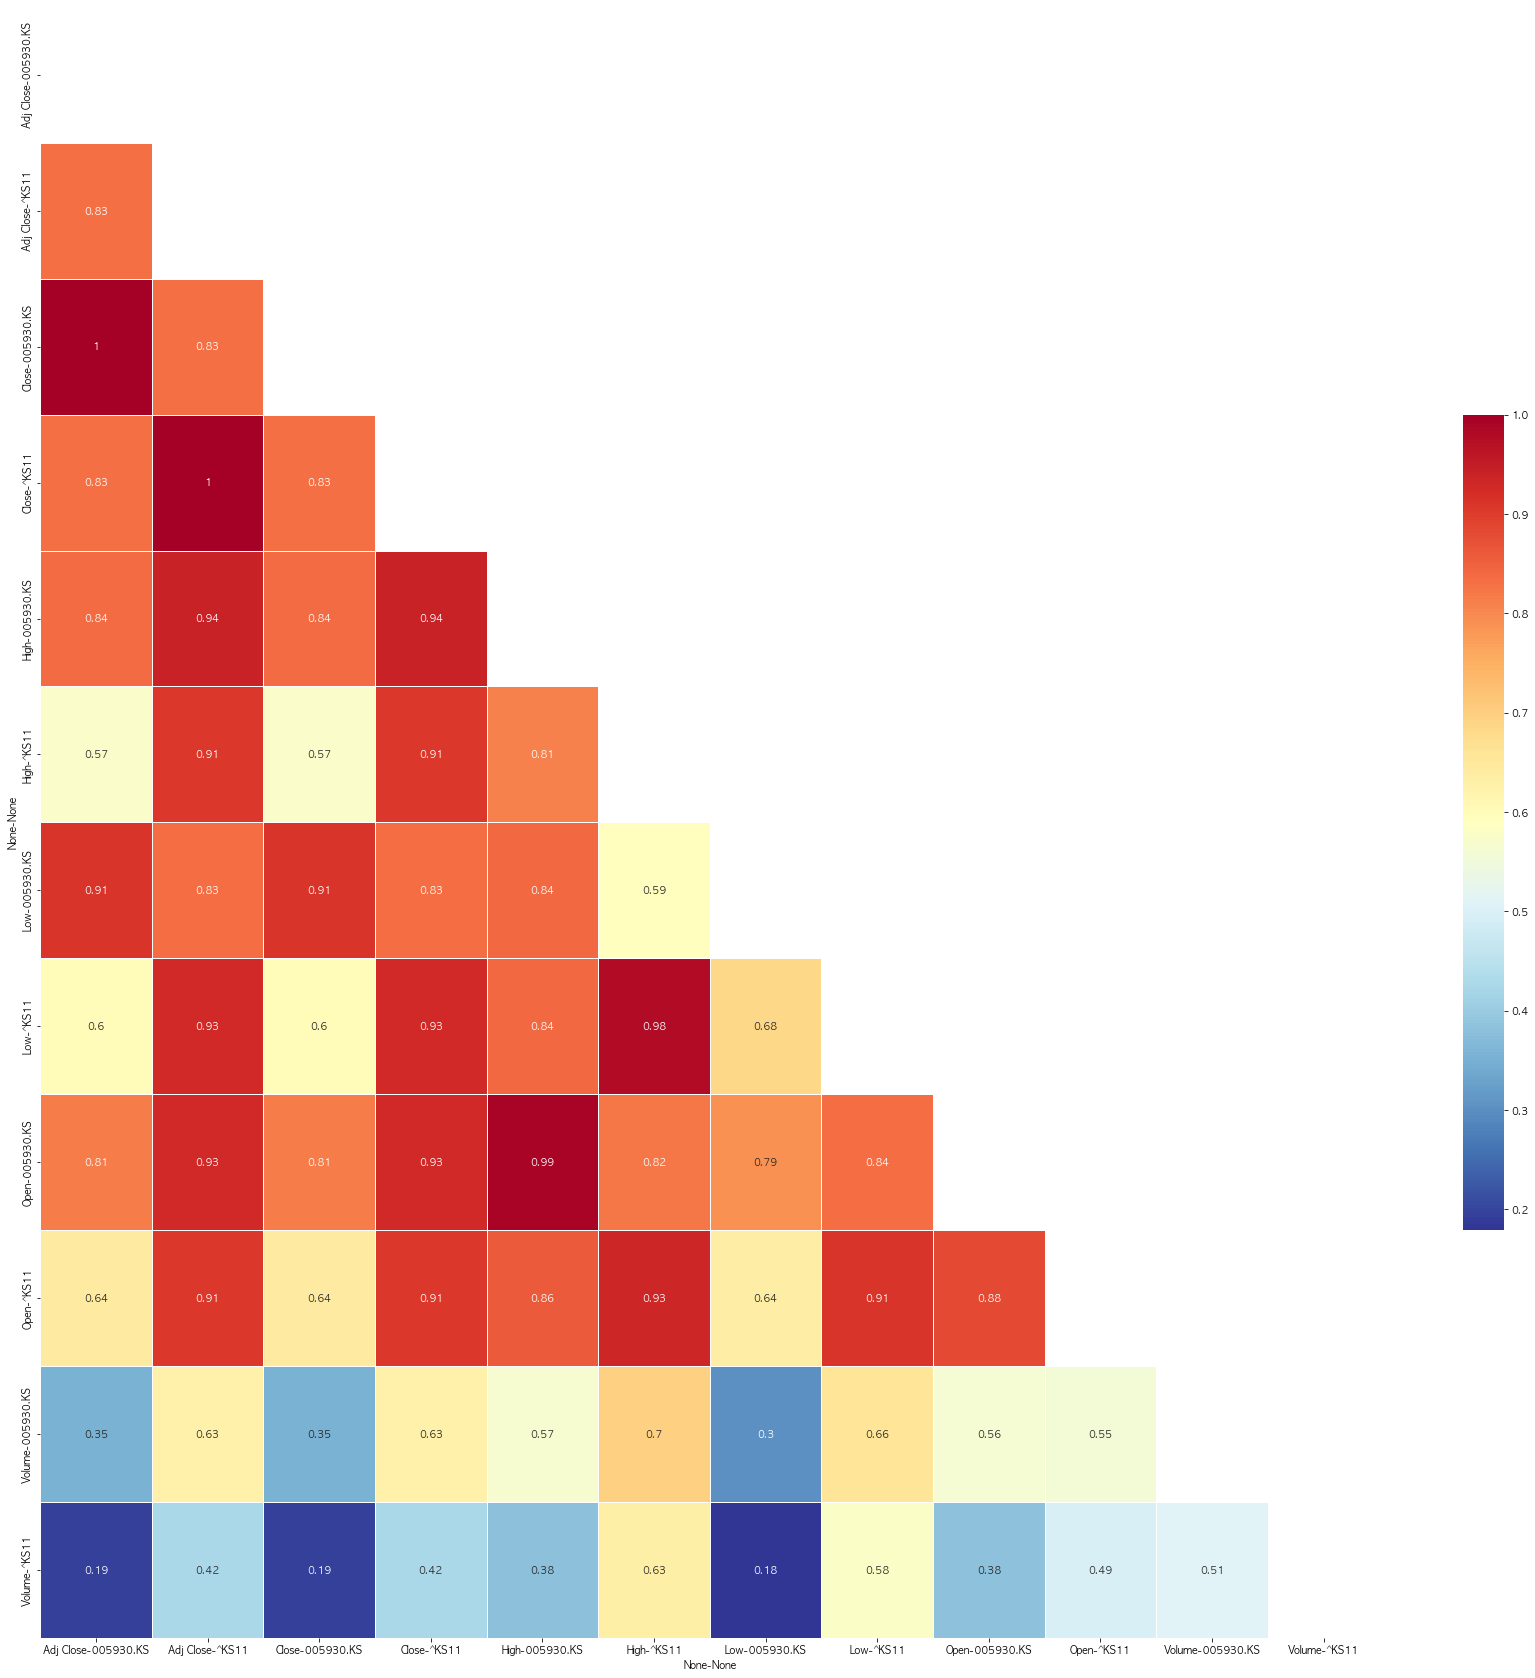

In [29]:
corr_heatmap(stock_price, method_option='spearman')

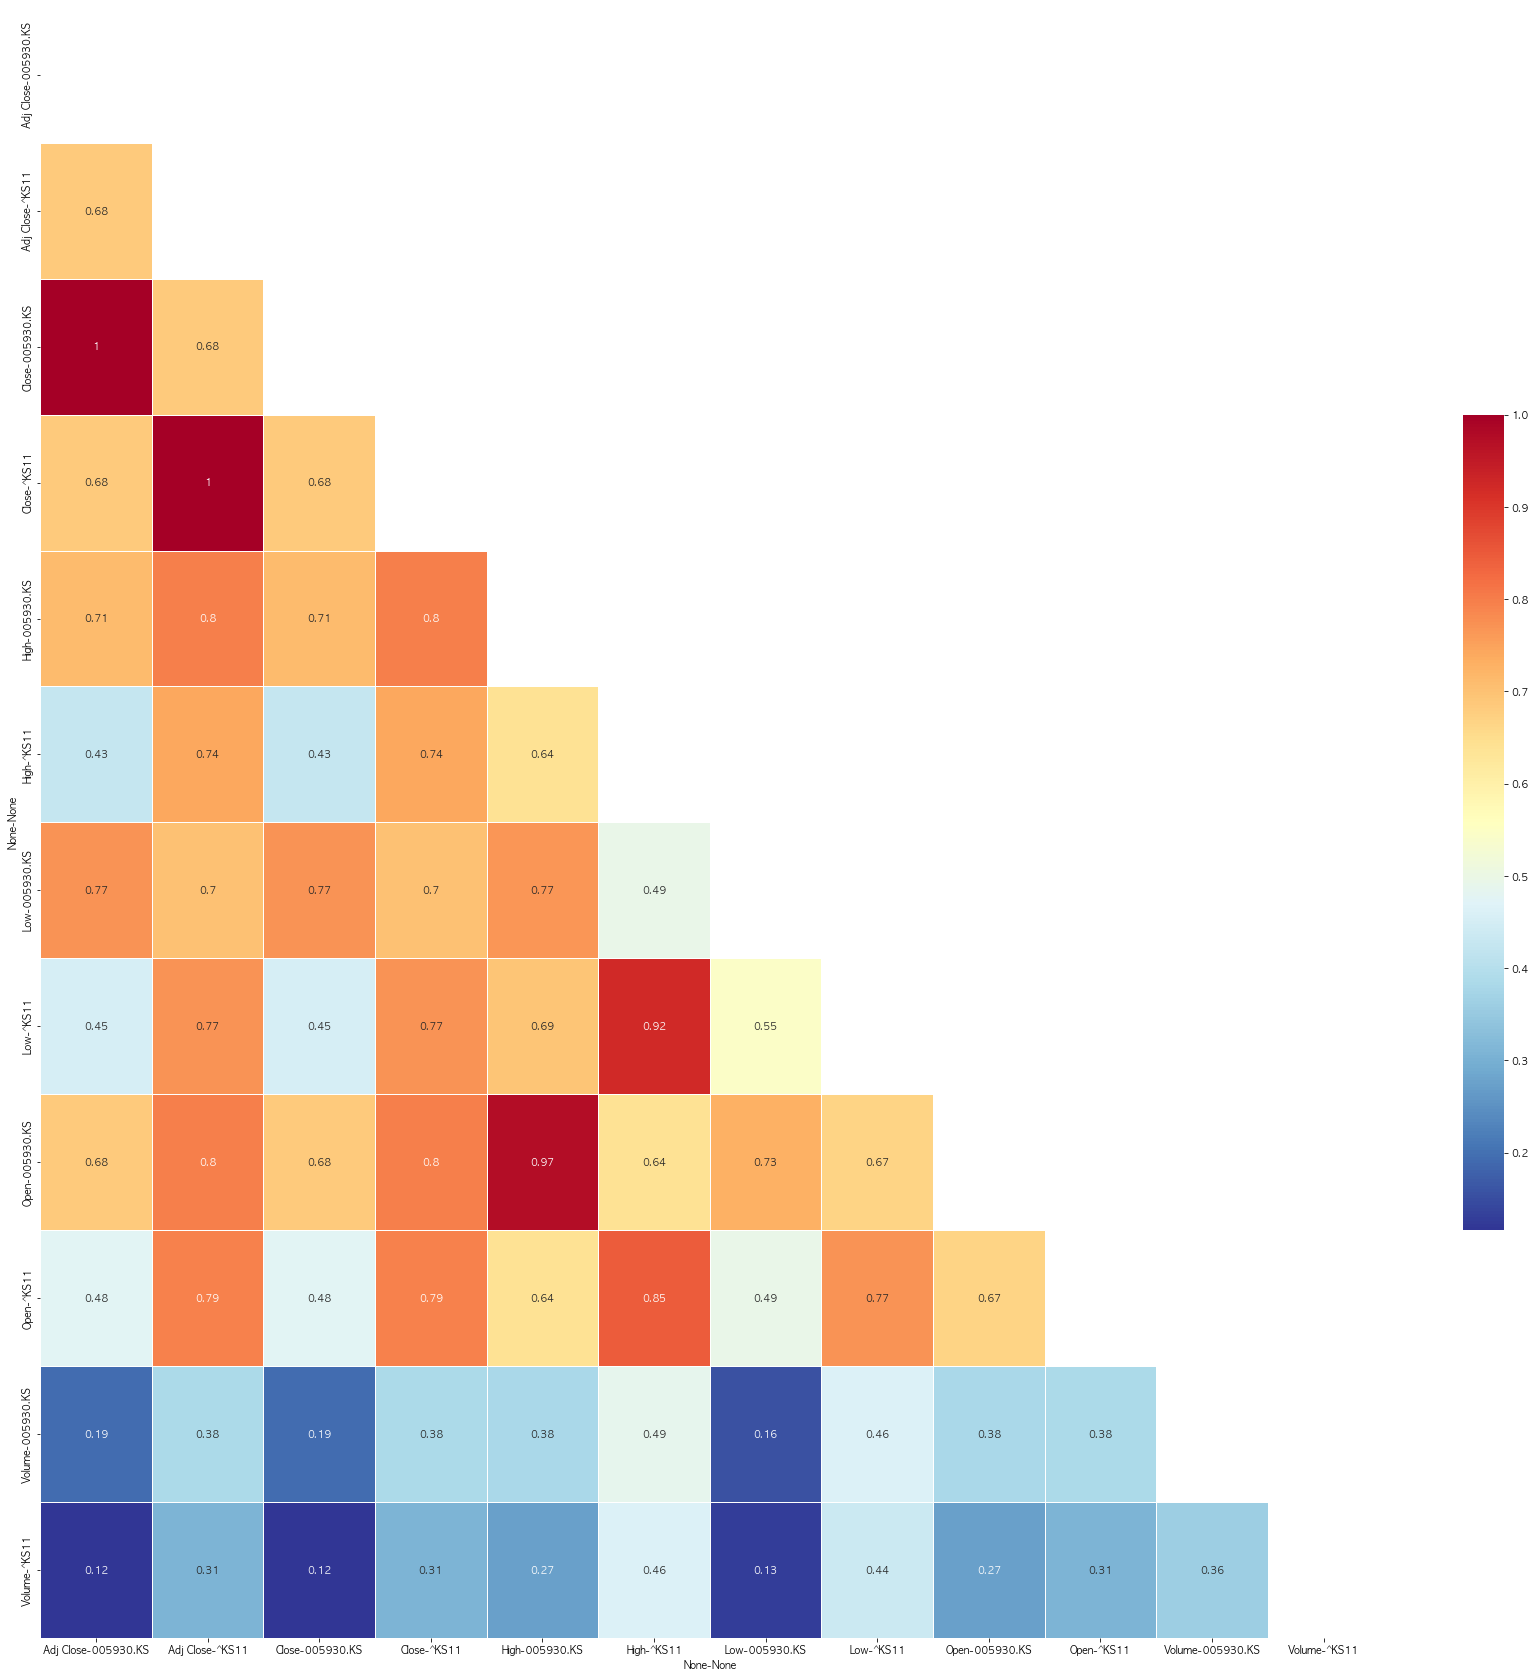

In [30]:
corr_heatmap(stock_price, method_option='kendall')

### 참고2) ACF, PACF (자기상관계수, 편자기상관계수)

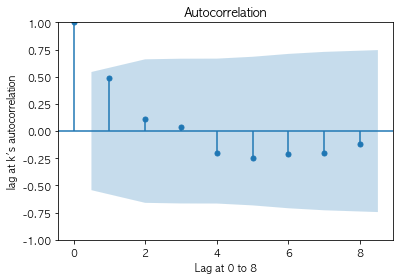

In [38]:
def acf_plot(data, N_LAGS, alpha): 
    from statsmodels.graphics.tsaplots import plot_acf 
    fig = plot_acf(data, lags=N_LAGS, alpha=alpha) 
    plt.xlabel(f'Lag at 0 to {N_LAGS}') 
    plt.ylabel("lag at k's autocorrelation") 
    plt.show()
    
acf_plot(stock_price['Adj Close']['005930.KS'], 8, 0.05)


lag at 0's autocorrelation =  1.0
lag at 1's autocorrelation =  0.58
lag at 2's autocorrelation =  0.18
lag at 3's autocorrelation =  0.07
lag at 4's autocorrelation =  -0.29
lag at 5's autocorrelation =  -0.37
lag at 6's autocorrelation =  -0.21
lag at 7's autocorrelation =  -0.24
lag at 8's autocorrelation =  -0.24


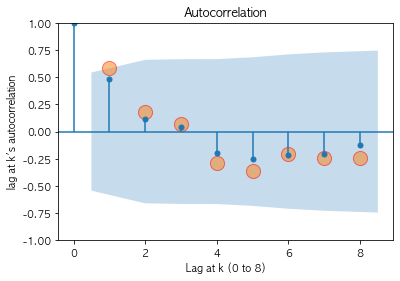

In [37]:
def acf_plot(data, N_LAGS, pval): 
    from statsmodels.graphics.tsaplots import plot_acf 
    auto = pd.Series(data.values) 
    for i in range(0, N_LAGS+1): 
        print(f"lag at {i}'s autocorrelation = ", round(auto.autocorr(lag=i),2)) 
        scatter = pd.DataFrame() 
        scatter['lags'] = [i for i in range (1, N_LAGS +1)] 
        scatter['autocorrelation'] = [ auto.autocorr(lag=i) for i in range(1, N_LAGS +1)] 
    fig = plot_acf(data, lags=N_LAGS, alpha=pval) 
    plt.xlabel(f'Lag at k (0 to {N_LAGS})') 
    plt.ylabel("lag at k's autocorrelation") 
    plt.scatter(x=scatter['lags'], y=scatter['autocorrelation'], edgecolors='red',linewidth=1, s=200, alpha = .5) 
    plt.show() 

acf_plot(stock_price['Adj Close']['005930.KS'], 8, 0.05)

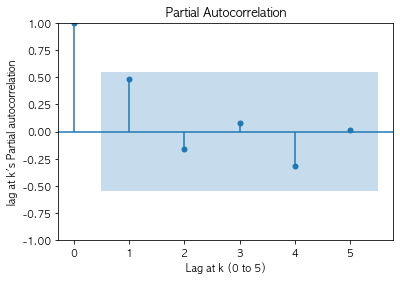

In [41]:
def pacf_plot(data, N_LAGS, pval): 
    from statsmodels.graphics.tsaplots import plot_pacf 
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm') 
    plt.xlabel(f'Lag at k (0 to {N_LAGS})') 
    plt.ylabel("lag at k's Partial autocorrelation") 
    plt.show() 
    
pacf_plot(stock_price['Adj Close']['005930.KS'], 5, 0.05)

In [42]:
def pacf(data, alpha, N_LAGS): 
    from statsmodels.tsa.stattools import pacf 
    result = pd.DataFrame() 
    result['pacf'] = pacf(data, alpha=alpha)[0][:N_LAGS+1] 
    result['upper confidence interval'] = [pacf(data, alpha=alpha)[1][i][1] for i in range(N_LAGS + 1)] 
    result['lower confidence interval'] = [pacf(data, alpha=alpha)[1][i][0] for i in range(N_LAGS + 1)] 
    
    return result 

result = pacf(stock_price['Adj Close']['005930.KS'], 0.05, 5) 
print(result)

       pacf  upper confidence interval  lower confidence interval
0  1.000000                   1.000000                   1.000000
1  0.527680                   1.071276                  -0.015916
2 -0.201784                   0.341813                  -0.745380
3  0.109346                   0.652942                  -0.434251
4 -0.499792                   0.043805                  -1.043388
5  0.048122                   0.591719                  -0.495474


lag at 0's Partial autocorrelation =  1.0
lag at 1's Partial autocorrelation =  0.53
lag at 2's Partial autocorrelation =  -0.2
lag at 3's Partial autocorrelation =  0.11
lag at 4's Partial autocorrelation =  -0.5
lag at 5's Partial autocorrelation =  0.05
1번째 lag애서 파란 음영의 값 범위는 -0.5657928670380858, +0.5657928670380858입니다.


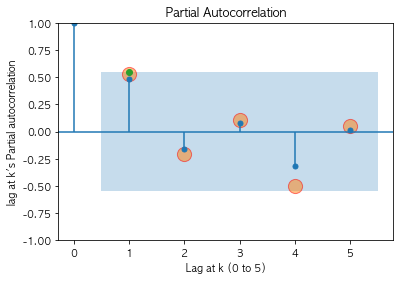

In [49]:
def pacf_plot(data, N_LAGS, alpha): 
    # 라이브러리 호출 
    from statsmodels.graphics.tsaplots import plot_pacf 
    from statsmodels.tsa.stattools import pacf 
    import scipy.stats
    
    # 편자기상관계수를 구하는 부분 
    auto = pd.Series(data.values) 
    
    for i in range(0, N_LAGS+1): 
        # lag 별 pacf 추정 계수를 출력하는 부분 
        print(f"lag at {i}'s Partial autocorrelation = ", round(pacf(data, alpha=.05)[0][i],2)) 
        
        scatter = pd.DataFrame() 
        scatter['lags'] = [i for i in range (1, N_LAGS +1)] 
        scatter['Partial autocorrelation'] = [pacf(data, alpha=.05)[0][i] for i in range(1, N_LAGS +1)] 
    print(f"1번째 lag애서 파란 음영의 값 범위는 -{scipy.stats.norm.ppf(1-(alpha)/2) * np.sqrt(1/(data.shape[0]-1))}, +{scipy.stats.norm.ppf(1-(alpha)/2) * np.sqrt(1/(data.shape[0]-1))}입니다.") 
    # 표 그리는 부분 
    plot_pacf(data, lags=N_LAGS, alpha=alpha, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})') 
    plt.ylabel("lag at k's Partial autocorrelation") 
    # lag 별로 PACF 추정 계수를 점으로 찍는 부분 
    plt.scatter(x=scatter['lags'], y=scatter['Partial autocorrelation'], edgecolors='red',linewidth=1, s=200, alpha = .5) 
    # lag = 1 에서 신뢰구간의 upper 부분을 점으로 찍는 부분 
    plt.scatter(x=1, y=[scipy.stats.norm.ppf(1-(alpha)/2) * (1/np.sqrt(data.shape[0]))]) 
    plt.show() 

pacf_plot(stock_price['Adj Close']['005930.KS'], 5, 0.05)


### 참고3) Cross correlation 시차상관계수

마케팅 비용과 수익의 0번째 기간 후 상관계수 값 :  0.77109
마케팅 비용과 수익의 1번째 기간 후 상관계수 값 :  0.46239
마케팅 비용과 수익의 2번째 기간 후 상관계수 값 :  0.19352
마케팅 비용과 수익의 3번째 기간 후 상관계수 값 : -0.06066
마케팅 비용과 수익의 4번째 기간 후 상관계수 값 : -0.28160
마케팅 비용과 수익의 5번째 기간 후 상관계수 값 : -0.44531
마케팅 비용과 수익의 6번째 기간 후 상관계수 값 : -0.49159
마케팅 비용과 수익의 7번째 기간 후 상관계수 값 : -0.35784
마케팅 비용과 수익의 8번째 기간 후 상관계수 값 : -0.15697
마케팅 비용과 수익의 9번째 기간 후 상관계수 값 : -0.03430
마케팅 비용과 수익의 10번째 기간 후 상관계수 값 :  0.01588
마케팅 비용과 수익의 11번째 기간 후 상관계수 값 :  0.00704


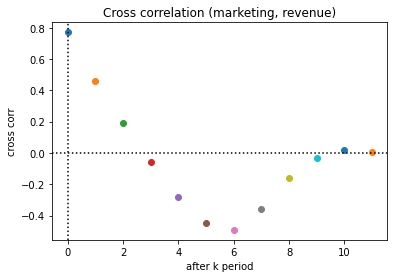

In [1]:
# 예시 : 마케팅 비용과 수익간의 상관성 분석
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

marketing = np.array([3, 4, 5, 5, 7, 9, 13, 15, 12, 10, 8, 8])
revenue = np.array([21, 19, 22, 24, 25, 29, 30, 34, 37, 40, 35, 30]) 


cc = sm.tsa.stattools.ccf(marketing, revenue, adjusted=False)

for i in range(len(cc)):
    print(f'마케팅 비용과 수익의 {i}번째 기간 후 상관계수 값 : {cc[i] : .5f}')

for i in range(len(cc)):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') # draw x =0 axes 
plt.axhline(y=0, color='k' ,linestyle = ':') # draw y =0 axes
plt.title('Cross correlation (marketing, revenue)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

In [6]:
x =2
y =3
np.dot(x, x) * np.dot(y, y)

36

In [5]:
def xcorr(x, y, normed=True, detrend=False, maxlags=10):
    # Cross correlation of two signals of equal length
    # Returns the coefficients when normed=True
    # Returns inner products when normed=False
    # Usage: lags, c = xcorr(x,y,maxlags=len(x)-1)
    # Optional detrending e.g. mlab.detrend_mean

    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')
    
    if detrend:
        import matplotlib.mlab as mlab
        x = mlab.detrend_mean(np.asarray(x)) # can set your preferences here
        y = mlab.detrend_mean(np.asarray(y))
    
    c = np.correlate(x, y, mode='full')

    if normed:
        n = np.sqrt(np.dot(x, x) * np.dot(y, y)) # this is the transformation function
        c = np.true_divide(c,n)

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maglags must be None or strictly '
                         'positive < %d' % Nx)

    lags = np.arange(-maxlags, maxlags + 1)
    c = c[Nx - 1 - maxlags:Nx + maxlags]
    
    return lags, c

xcorr(marketing, revenue, maxlags=5)

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 array([0.48499974, 0.63799254, 0.76590456, 0.86183857, 0.91858386,
        0.96216172, 0.90510293, 0.82954706, 0.73329954, 0.64771135,
        0.55679349]))

#### 참고 3 실습 : 한국국채 10년물, KOSPI

In [151]:
import FinanceDataReader as fdr

kr10YT = fdr.DataReader('KR10YT=RR','2010-01-01', '2020-01-01')
ks11 = fdr.DataReader('KS11', '2010-01-01', '2020-01-01')

In [152]:
# 월말 영업일 데이터만 추출 시행

# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
kr10YT = kr10YT.reset_index()
start_date = kr10YT['Date'].astype(str).iloc[0]
end_date = kr10YT['Date'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all = pd.date_range(start_date, end_date, freq='B').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)

# 데이터 병합 (영업일 date와 10년물 국체 병합)
df_all = pd.merge(date_all,kr10YT,how='left')

# 직전 값으로 NaN 값 채우기
df_all = df_all.fillna(method='ffill')

# 마지막 영업일 제외후 나머지 drop
df_KR10 = df_all.set_index(df_all['Date'])

# 각 월당 마지막 영업일 도출
month_end = pd.date_range('2010-01-01', '2020-01-01', freq='BM')

# 마지막 영업일 제외후 나머지 drop
kr10yt_BM = df_KR10[df_KR10['Date'].isin(month_end)].reset_index(drop=True)
kr10yt_BM = kr10yt_BM.set_index(kr10yt_BM['Date'])
kr10yt_BM = kr10yt_BM.drop(columns='Date')
kr10yt_BM.head()

,Close,Open,High,Low,Change
Date,,,,,
2010-01-29,5.34,5.34,5.34,5.34,-0.0056
2010-02-26,5.13,5.13,5.13,5.13,0.0000
2010-03-31,4.94,4.94,4.94,4.94,-0.0120
2010-04-30,4.83,4.83,4.83,4.83,0.0021
2010-05-31,4.94,4.94,4.94,4.94,0.0041


In [162]:
# 전월대비 수익률 도출 (pct_change 사용, %로 표현하기 위해 100을 곱해준다)

kr10yt_bm_return = kr10yt_BM['Close'].pct_change().dropna()
kr10yt_bm_return = pd.DataFrame(kr10yt_bm_return) * 100
kr10yt_bm_return.head()

,Close
Date,
2010-02-26,-3.932584
2010-03-31,-3.703704
2010-04-30,-2.226721
2010-05-31,2.277433
2010-06-30,0.000000


In [153]:
# 월말 영업일 데이터만 추출 시행

# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
ks11 = ks11.reset_index()
start_date = ks11['Date'].astype(str).iloc[0]
end_date = ks11['Date'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all = pd.date_range(start_date, end_date, freq='B').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)

# 데이터 병합 (영업일 date와 10년물 국체 병합)
df_all = pd.merge(date_all,ks11,how='left')

# 직전 값으로 NaN 값 채우기
df_all = df_all.fillna(method='ffill')


# 마지막 영업일 제외후 나머지 drop
df_ks11 = df_all.set_index(df_all['Date'])

# 각 월당 마지막 영업일 도출
month_end = pd.date_range('2010-01-01', '2020-01-01', freq='BM')

# 마지막 영업일 제외후 나머지 drop
ks11_BM = df_ks11[df_ks11['Date'].isin(month_end)].reset_index(drop=True)
ks11_BM = ks11_BM.set_index(ks11_BM['Date'])
ks11_BM = ks11_BM.drop(columns='Date')
ks11_BM.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-29,1602.43,1621.00,1626.57,1595.39,473940000.0,-0.0244
2010-02-26,1594.58,1593.73,1596.55,1580.70,331760000.0,0.0045
2010-03-31,1692.85,1702.58,1704.81,1689.92,328320000.0,-0.0043
2010-04-30,1741.56,1742.32,1749.69,1739.81,412070000.0,0.0076
2010-05-31,1641.25,1625.08,1641.25,1621.09,299380000.0,0.0114


In [161]:
# 전월대비 수익률 도출 (pct_change 사용, %로 표현하기 위해 100을 곱해준다)

kospi_bm_return = ks11_BM['Close'].pct_change().dropna()
kospi_bm_return = pd.DataFrame(kospi_bm_return) * 100
kospi_bm_return.head()

,Close
Date,
2010-02-26,-0.489881
2010-03-31,6.162751
2010-04-30,2.877396
2010-05-31,-5.759779
2010-06-30,3.475400


10년물 국체수익률과 코스피지수의 0개월 후 상관계수 값 : -0.43303
10년물 국체수익률과 코스피지수의 1개월 후 상관계수 값 : -0.45656
10년물 국체수익률과 코스피지수의 2개월 후 상관계수 값 : -0.44144
10년물 국체수익률과 코스피지수의 3개월 후 상관계수 값 : -0.41604
10년물 국체수익률과 코스피지수의 4개월 후 상관계수 값 : -0.40058
10년물 국체수익률과 코스피지수의 5개월 후 상관계수 값 : -0.39650
10년물 국체수익률과 코스피지수의 6개월 후 상관계수 값 : -0.38512
10년물 국체수익률과 코스피지수의 7개월 후 상관계수 값 : -0.37847
10년물 국체수익률과 코스피지수의 8개월 후 상관계수 값 : -0.37944
10년물 국체수익률과 코스피지수의 9개월 후 상관계수 값 : -0.37080
10년물 국체수익률과 코스피지수의 10개월 후 상관계수 값 : -0.36968
10년물 국체수익률과 코스피지수의 11개월 후 상관계수 값 : -0.36963
10년물 국체수익률과 코스피지수의 12개월 후 상관계수 값 : -0.36676
10년물 국체수익률과 코스피지수의 13개월 후 상관계수 값 : -0.38482
10년물 국체수익률과 코스피지수의 14개월 후 상관계수 값 : -0.41424
10년물 국체수익률과 코스피지수의 15개월 후 상관계수 값 : -0.42477
10년물 국체수익률과 코스피지수의 16개월 후 상관계수 값 : -0.45561
10년물 국체수익률과 코스피지수의 17개월 후 상관계수 값 : -0.49250
10년물 국체수익률과 코스피지수의 18개월 후 상관계수 값 : -0.51110
10년물 국체수익률과 코스피지수의 19개월 후 상관계수 값 : -0.52868
10년물 국체수익률과 코스피지수의 20개월 후 상관계수 값 : -0.54698
10년물 국체수익률과 코스피지수의 21개월 후 상관계수 값 : -0.53097
10년물 국체수익률과 코스피지수의 22개월 후 상관계수 값 : -0.5106

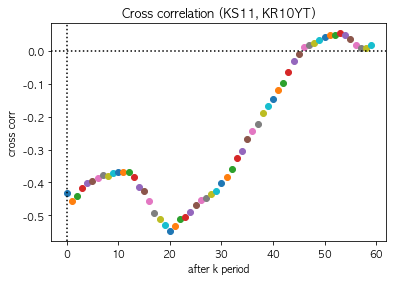

In [160]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

kr10yt_data = np.array(kr10yt_BM['Close'])
ks11_data = np.array(ks11_BM['Close'])


cc = sm.tsa.stattools.ccf(ks11_data, kr10yt_data, adjusted=False, fft=True)

for i in range(60):
    print(f'10년물 국체수익률과 코스피지수의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(60):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

10년물 국체수익률과 코스피지수 수익률의 0개월 후 상관계수 값 :  0.12547
10년물 국체수익률과 코스피지수 수익률의 1개월 후 상관계수 값 :  0.14507
10년물 국체수익률과 코스피지수 수익률의 2개월 후 상관계수 값 : -0.13085
10년물 국체수익률과 코스피지수 수익률의 3개월 후 상관계수 값 :  0.02708
10년물 국체수익률과 코스피지수 수익률의 4개월 후 상관계수 값 :  0.07631
10년물 국체수익률과 코스피지수 수익률의 5개월 후 상관계수 값 :  0.09027
10년물 국체수익률과 코스피지수 수익률의 6개월 후 상관계수 값 :  0.01290
10년물 국체수익률과 코스피지수 수익률의 7개월 후 상관계수 값 :  0.01621
10년물 국체수익률과 코스피지수 수익률의 8개월 후 상관계수 값 : -0.04429
10년물 국체수익률과 코스피지수 수익률의 9개월 후 상관계수 값 : -0.04753
10년물 국체수익률과 코스피지수 수익률의 10개월 후 상관계수 값 : -0.00915
10년물 국체수익률과 코스피지수 수익률의 11개월 후 상관계수 값 : -0.06412
10년물 국체수익률과 코스피지수 수익률의 12개월 후 상관계수 값 :  0.06611
10년물 국체수익률과 코스피지수 수익률의 13개월 후 상관계수 값 :  0.08057
10년물 국체수익률과 코스피지수 수익률의 14개월 후 상관계수 값 : -0.07865
10년물 국체수익률과 코스피지수 수익률의 15개월 후 상관계수 값 :  0.04310
10년물 국체수익률과 코스피지수 수익률의 16개월 후 상관계수 값 : -0.05456
10년물 국체수익률과 코스피지수 수익률의 17개월 후 상관계수 값 : -0.19848
10년물 국체수익률과 코스피지수 수익률의 18개월 후 상관계수 값 :  0.05902
10년물 국체수익률과 코스피지수 수익률의 19개월 후 상관계수 값 : -0.05833
10년물 국체수익률과 코스피지수 수익률의 20개월 후 상관계수 값 : -0.13140
10

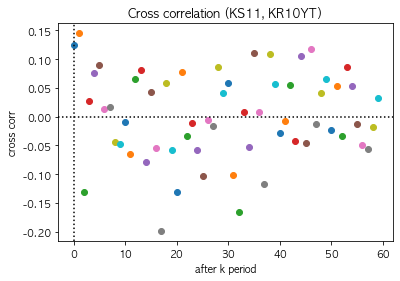

In [181]:
# 예시 : 마케팅 비용과 수익간의 상관성 분석
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

kr10yt_data = np.array(kr10yt_bm_return['Close'])
ks11_data = np.array(kospi_bm_return['Close'])


cc = sm.tsa.stattools.ccf(ks11_data, kr10yt_data, adjusted=False, fft=True)

for i in range(60):
    print(f'10년물 국체수익률과 코스피지수 수익률의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(60):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()